# Нейронные сети (Keras)

N1 = x1*w1 + x2*w2 результат в одном нейроне

Y = N1*wk + N2*wp результат выходного слоя

Существуют входные слои (исходные данные, те или иные)

Скрытый слой (некоторое количество слоев с некоторым кол-вом нейронов)

Выходной слой (необязательно один нейрон)

### В нейроне существуют функции активации - функция применяемая на сложенные значения в нейроне

identity - ничего не делаем

logistic (сигмоид) f(x)=1/(1+exp(x))

relu (линейный выпрямитель) f(x) = max(0,x) - обнуляет отрицательнные значения

tanh (гиперболический тангенс) - f(x)=tanh(x)=(exp(x)-exp(-x))/(exp(x)+exp(-x))

### Всё это нужно для такой нормировки данных

## Оптимизаторы

В итоге сводим задачу к нахождению весов весов для сведения ошибки к минимум, начинаем это делать с конца

lbfgs - квазиньютоновский метод, итерационный метод 

sgd - стохастический градиентный спуск, вместо реального градиента вычисляют его оценку (так вычислительно проще)

adam - близкие к оптимуму параметры должны меняться меньше, другие сильнее (идейно должен лучше преодолевать локальные минимумы)

In [126]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [127]:
df = pd.read_csv('delaney-processed.csv')

In [128]:
df.head()

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O)
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.33,c1ccsc1


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 10 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Compound ID                                      1128 non-null   object 
 1   ESOL predicted log solubility in mols per litre  1128 non-null   float64
 2   Minimum Degree                                   1128 non-null   int64  
 3   Molecular Weight                                 1128 non-null   float64
 4   Number of H-Bond Donors                          1128 non-null   int64  
 5   Number of Rings                                  1128 non-null   int64  
 6   Number of Rotatable Bonds                        1128 non-null   int64  
 7   Polar Surface Area                               1128 non-null   float64
 8   measured log solubility in mols per litre        1128 non-null   float64
 9   smiles                        

In [130]:
x = np.array(df.iloc[:,3:8]) #отобрали 5 колонок для модели
y = np.array(df.iloc[:,8]).reshape(-1,1)
print(x.shape,y.shape)

(1128, 5) (1128, 1)


In [131]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [132]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=1240, train_size=0.8)
print(x_test.shape)

(226, 5)


In [133]:

from tensorflow.keras.models import Sequential

In [134]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import metrics

Делаем нейроку с такими слоями: Схема из 5 >>> 10 >>> 5 >>> 3 >>> 1 результат

In [135]:
nn1 = Sequential() # сгенирили прямоходную модель
nn1.add(Dense(10, input_dim=5)) # генерим слои + вводим на первый раз кол-во исходных данных
nn1.add(Dense(5))
nn1.add(Dense(3))
nn1.add(Dense(1))

In [136]:
nn1.compile(loss='mse', optimizer=Adam(learning_rate=0.001)) #создали модель с алгоритмом Adam

In [137]:
hist1 = nn1.fit(x_train, y_train, validation_data=(x_test, y_test),
        batch_size=100, epochs=100, verbose=1) #обучение происходить обычно пачками данных (не целиком), когда они закончились - прошла эпоха

Epoch 1/100
10/10 [==============================] - 1s 25ms/step - loss: 13.3462 - val_loss: 14.3660
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 12.9530 - val_loss: 13.9721
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 12.5662 - val_loss: 13.5762
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 12.1917 - val_loss: 13.1536
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 11.7710 - val_loss: 12.7085
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 11.3397 - val_loss: 12.2422
Epoch 7/100
10/10 [==============================] - 0s 13ms/step - loss: 10.8663 - val_loss: 11.6931
Epoch 8/100
10/10 [==============================] - 0s 13ms/step - loss: 10.3139 - val_loss: 11.0823
Epoch 9/100
10/10 [==============================] - 0s 13ms/step - loss: 9.7145 - val_loss: 10.4152
Epoch 10/100
10/10 [==============================] - 0s 13ms/step - loss: 9.0008 - val_

In [138]:
y_pred = nn1.predict(x_test)

8/8 [==============================] - 0s 1ms/step


In [139]:
from sklearn import metrics as s_metrics

In [140]:
print('Тренировочный набор R2',s_metrics.r2_score(y_train, nn1.predict(x_train)))
print('Тестовый набор R2',s_metrics.r2_score(y_test,y_pred))

29/29 [==============================] - 0s 871us/step
Тренировочный набор R2 0.6812999571553071
Тестовый набор R2 0.6816906736906896


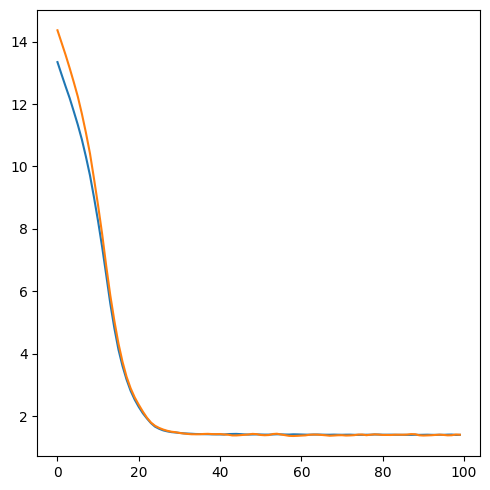

In [141]:
fig, ax = plt.subplots(figsize=(5,5)) # строим кривые обучения
ax.plot(hist1.history['loss'])# потери для тренировочного набора
ax.plot(hist1.history['val_loss']) # потери для тестого набора

plt.tight_layout()
plt.show()

29/29 [==============================] - 0s 857us/step


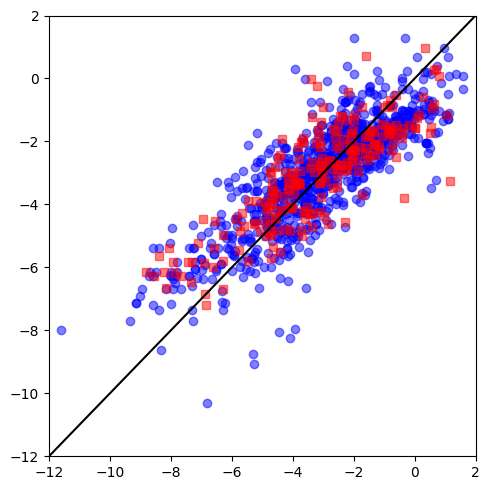

In [142]:
fig, ax = plt.subplots(figsize=(5,5))

ax.plot(y_train, nn1.predict(x_train), 'bo', alpha=0.5)
ax.plot(y_test, y_pred, 'rs', alpha=0.5)

ax.plot([-12,2], [-12,2], 'k-')

ax.set_xlim((-12,2))
ax.set_ylim((-12,2))

plt.tight_layout()
plt.show()

# Различие архитектуры нейронных сетей

Для начала ещё два механизма для устранения переобучения:

1) Слой DropOut - выключает некоторую долю нейронов в следующем слое во время обучения (не предсказания) (допустим треть нейронов из этого слоя)

Так слой становиться более сбалансированный, так как каждый будет участвовать в обучении 

2) Слой BathNormalization - нормализует входящие в него веса, что всё подделать получше

In [143]:
#Dropout
from tensorflow.keras.layers import Dropout
nn2 = Sequential() # сгенирили прямоходную модель
nn2.add(Dense(20, input_dim=5)) # генерим слои + вводим на первый раз кол-во исходных данных
nn2.add(Dropout(0.2))
nn2.add(Dense(20))
nn2.add(Dropout(0.33))
nn2.add(Dense(3))
nn2.add(Dense(1))

In [144]:
nn2.compile(loss='mse', optimizer=Adam(learning_rate=0.001)) 
hist2 = nn2.fit(x_train, y_train, validation_data=(x_test, y_test),
        batch_size=100, epochs=60, verbose=1) 

Epoch 1/60
10/10 [==============================] - 1s 21ms/step - loss: 12.9973 - val_loss: 12.8454
Epoch 2/60
10/10 [==============================] - 0s 5ms/step - loss: 11.6027 - val_loss: 11.3913
Epoch 3/60
10/10 [==============================] - 0s 6ms/step - loss: 10.0540 - val_loss: 10.1368
Epoch 4/60
10/10 [==============================] - 0s 6ms/step - loss: 9.1033 - val_loss: 8.9902
Epoch 5/60
10/10 [==============================] - 0s 8ms/step - loss: 8.2924 - val_loss: 7.9186
Epoch 6/60
10/10 [==============================] - 0s 9ms/step - loss: 7.2364 - val_loss: 6.9535
Epoch 7/60
10/10 [==============================] - 0s 9ms/step - loss: 6.6823 - val_loss: 6.1137
Epoch 8/60
10/10 [==============================] - 0s 9ms/step - loss: 6.0626 - val_loss: 5.2907
Epoch 9/60
10/10 [==============================] - 0s 9ms/step - loss: 5.2889 - val_loss: 4.5229
Epoch 10/60
10/10 [==============================] - 0s 9ms/step - loss: 5.0789 - val_loss: 3.8457
Epoch 11/60


In [145]:
y_pred = nn2.predict(x_test)
print(f'Тренировочный набор R2: {s_metrics.r2_score(y_train, nn2.predict(x_train)): .4f}')
print(f'Тестовый набор R2: {s_metrics.r2_score(y_test,y_pred): .4f}')

29/29 [==============================] - 0s 890us/step
Тренировочный набор R2:  0.6682
Тестовый набор R2:  0.6505


In [146]:
print(nn2.summary()) #возвращает некотрую общую информацию о модели

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_47 (Dense)            (None, 20)                120       
                                                                 
 dropout_34 (Dropout)        (None, 20)                0         
                                                                 
 dense_48 (Dense)            (None, 20)                420       
                                                                 
 dropout_35 (Dropout)        (None, 20)                0         
                                                                 
 dense_49 (Dense)            (None, 3)                 63        
                                                                 
 dense_50 (Dense)            (None, 1)                 4         
                                                                 
Total params: 607
Trainable params: 607
Non-trainable

In [147]:
#BaBatchNormalization
from tensorflow.keras.layers import BatchNormalization
nn3 = Sequential() # сгенирили прямоходную модель
nn3.add(Dense(50, input_dim=5)) # генерим слои + вводим на первый раз кол-во исходных данных
nn3.add(Dropout(0.2))
nn3.add(Dense(50))
nn3.add(Dropout(0.33))
nn3.add(BatchNormalization())
nn3.add(Dense(3))
nn3.add(Dense(1))

In [148]:
nn3.compile(loss='mse', optimizer=Adam(learning_rate=0.001)) 
hist2 = nn3.fit(x_train, y_train, validation_data=(x_test, y_test),
        batch_size=100, epochs=60, verbose=1)


Epoch 1/60
10/10 [==============================] - 1s 26ms/step - loss: 14.0656 - val_loss: 12.5059
Epoch 2/60
10/10 [==============================] - 0s 6ms/step - loss: 10.7124 - val_loss: 10.9228
Epoch 3/60
10/10 [==============================] - 0s 7ms/step - loss: 10.0342 - val_loss: 10.0772
Epoch 4/60
10/10 [==============================] - 0s 6ms/step - loss: 9.4548 - val_loss: 9.3424
Epoch 5/60
10/10 [==============================] - 0s 6ms/step - loss: 8.7559 - val_loss: 8.7606
Epoch 6/60
10/10 [==============================] - 0s 6ms/step - loss: 8.4418 - val_loss: 8.1878
Epoch 7/60
10/10 [==============================] - 0s 5ms/step - loss: 7.4208 - val_loss: 7.5329
Epoch 8/60
10/10 [==============================] - 0s 6ms/step - loss: 6.8649 - val_loss: 6.8964
Epoch 9/60
10/10 [==============================] - 0s 6ms/step - loss: 6.6786 - val_loss: 6.3229
Epoch 10/60
10/10 [==============================] - 0s 6ms/step - loss: 6.0311 - val_loss: 5.6302
Epoch 11/60


In [149]:
y_pred = nn3.predict(x_test)
print(f'Тренировочный набор R2: {s_metrics.r2_score(y_train, nn3.predict(x_train)): .4f}')
print(f'Тестовый набор R2: {s_metrics.r2_score(y_test,y_pred): .4f}')

29/29 [==============================] - 0s 1ms/step
Тренировочный набор R2:  0.6717
Тестовый набор R2:  0.6605


## Рекуррентные сети (LSTM)

Может использовать данные уже обработанные и новые одновременно

In [150]:
!pip install rdkit-pypi
from rdkit import Chem, DataStructs
from rdkit.Chem import Draw, AllChem, PandasTools, Descriptors
from rdkit.Chem.Draw import IPythonConsole


[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [151]:
with open('10k_rndm_zinc_drugs_clean.txt') as f:
    raw_text = '\n'.join(line.strip() for line in f)

In [152]:
print(len(raw_text))

453342


In [153]:
un_chars = sorted(list(set(raw_text)))
print(un_chars)

['\n', '#', '(', ')', '+', '-', '/', '1', '2', '3', '4', '5', '6', '7', '=', '@', 'B', 'C', 'F', 'H', 'I', 'N', 'O', 'P', 'S', '[', '\\', ']', 'c', 'l', 'n', 'o', 'r', 's']


In [154]:
char_to_int = dict((c,i) for i, c in enumerate(un_chars))




int_to_char = dict((i,c) for i, c in enumerate(un_chars))
char_to_int.update({-1:'\n'})
int_to_char.update({'\n':-1})


In [155]:
seq_l = 137
dataX = []
dataY = []
for i in range(len(raw_text)-seq_l):
    s_in = raw_text[i:i+seq_l]
    s_out = raw_text[i+seq_l]
    dataX.append([char_to_int[c] for c in s_in])
    dataY.append(char_to_int[s_out])


In [156]:
n_pat = len(dataX)
print(n_pat)

453205


In [157]:
X = np.reshape(dataX, (n_pat, seq_l, 1))

In [158]:
X = X/len(un_chars)

In [159]:
from keras.utils import np_utils
Y = np_utils.to_categorical(dataY) #превращает сет категариальных данных в дампис (матрица квадратная с нулями и единицами)

In [160]:
from tensorflow.keras.layers import LSTM
nn4 = Sequential() # сгенирили прямоходную модель
nn4.add(LSTM(64, input_shape=(X.shape[1], X.shape[0]), return_sequences=True)) # генерим слои + вводим на первый раз кол-во исходных данных
nn4.add(Dropout(0.2))
nn4.add(LSTM(128, return_sequences=True))
nn4.add(Dropout(0.2))
nn4.add(LSTM(256, return_sequences=True))
nn4.add(Dropout(0.2))
nn4.add(LSTM(128, return_sequences=True))
nn4.add(Dropout(0.2))
nn4.add(LSTM(64))
nn4.add(Dropout(0.2))
nn4.add(Dense(Y.shape[1], activation='softmax'))

In [161]:
print(nn4.summary())

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 137, 64)           116037120 
                                                                 
 dropout_38 (Dropout)        (None, 137, 64)           0         
                                                                 
 lstm_17 (LSTM)              (None, 137, 128)          98816     
                                                                 
 dropout_39 (Dropout)        (None, 137, 128)          0         
                                                                 
 lstm_18 (LSTM)              (None, 137, 256)          394240    
                                                                 
 dropout_40 (Dropout)        (None, 137, 256)          0         
                                                                 
 lstm_19 (LSTM)              (None, 137, 128)        

In [162]:
from keras.callbacks import ModelCheckpoint
Charlie = ModelCheckpoint('weight', verbose=1)
nn4.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001)) 

In [163]:


hist4 = nn4.fit(X, Y, batch_size=1024, epochs=10, verbose=1, callbacks=[Charlie])

Epoch 1/10


ValueError: in user code:

    File "c:\Users\Hipor\projects\.venv\Lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\Hipor\projects\.venv\Lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Hipor\projects\.venv\Lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\Hipor\projects\.venv\Lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\Hipor\projects\.venv\Lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\Hipor\projects\.venv\Lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_17' (type Sequential).
    
    Input 0 of layer "lstm_16" is incompatible with the layer: expected shape=(None, None, 453205), found shape=(None, 137, 1)
    
    Call arguments received by layer 'sequential_17' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 137, 1), dtype=float32)
      • training=True
      • mask=None


In [ ]:
y_pred = nn4.predict(x_test)
print(f'Тренировочный набор R2: {s_metrics.r2_score(y_train, nn4.predict(x_train)): .4f}')
print(f'Тестовый набор R2: {s_metrics.r2_score(y_test,y_pred): .4f}')